#📌 Extracão

In [9]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [11]:
df['contas_diaria'] = df['account.Charges.Monthly']/30

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [16]:
df['Churn'].value_counts()
df.dtypes


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
contas_diaria                float64
dtype: object

In [17]:
df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'],
    errors='coerce'
)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [22]:
df[binarias].dtypes


Churn                        object
customer.Partner             object
customer.Dependents          object
phone.PhoneService           object
account.PaperlessBilling     object
internet.OnlineSecurity      object
internet.OnlineBackup        object
internet.DeviceProtection    object
internet.TechSupport         object
internet.StreamingTV         object
internet.StreamingMovies     object
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [24]:
df[['customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'contas_diaria']].describe()


,customer.tenure,account.Charges.Monthly,account.Charges.Total,contas_diaria
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157337
std,24.571773,30.129572,2268.632997,1.004319
min,0.000000,18.250000,18.800000,0.608333
25%,9.000000,35.425000,400.225000,1.180833
50%,29.000000,70.300000,1391.000000,2.343333
75%,55.000000,89.875000,3785.300000,2.995833
max,72.000000,118.750000,8684.800000,3.958333


In [25]:
estatisticas = df[['customer.tenure',
                   'account.Charges.Monthly',
                   'account.Charges.Total',
                   'contas_diaria']].agg(
    ['mean', 'median', 'std']
)

estatisticas


,customer.tenure,account.Charges.Monthly,account.Charges.Total,contas_diaria
mean,32.346498,64.720098,2280.634213,2.157337
median,29.000000,70.300000,1391.000000,2.343333
std,24.571773,30.129572,2268.632997,1.004319


In [26]:
df.groupby('Churn')[[
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'contas_diaria'
]].mean()


,customer.tenure,account.Charges.Monthly,account.Charges.Total,contas_diaria
Churn,,,,
,31.571429,63.412277,2196.933705,2.113743
No,37.569965,61.265124,2555.344141,2.042171
Yes,17.979133,74.441332,1531.796094,2.481378


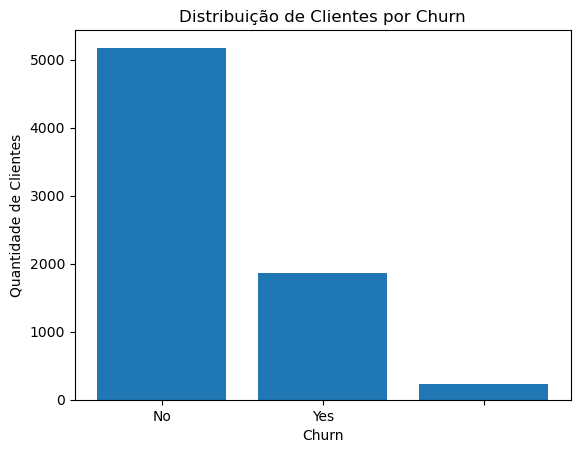

In [27]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Clientes por Churn')
plt.show()


#📊 Carga e análise

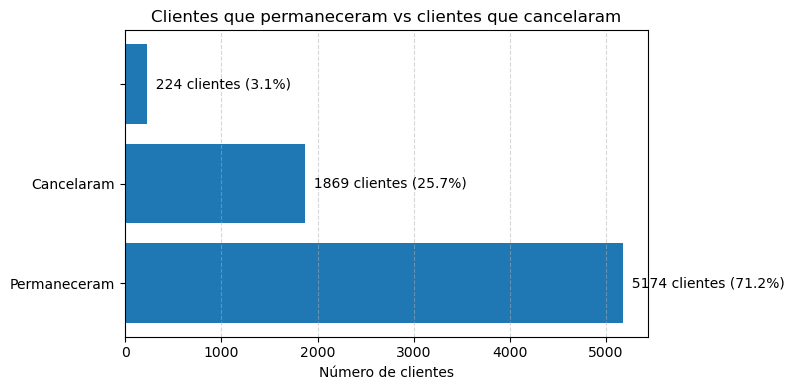

In [31]:
import matplotlib.pyplot as plt

# Contagem do churn
churn_counts = df['Churn'].value_counts()

# Renomeando para linguagem leiga
churn_counts = churn_counts.rename({
    'Yes': 'Cancelaram',
    'No': 'Permaneceram'
})

# Percentual
churn_percent = churn_counts / churn_counts.sum() * 100

plt.figure(figsize=(8, 4))
plt.barh(churn_counts.index, churn_counts.values)

plt.xlabel('Número de clientes')
plt.ylabel('')
plt.title('Clientes que permaneceram vs clientes que cancelaram')

# Grade leve
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Rótulos explicativos
for i, value in enumerate(churn_counts.values):
    plt.text(
        value,
        i,
        f'  {value} clientes ({churn_percent.iloc[i]:.1f}%)',
        va='center'
    )

plt.tight_layout()
plt.show()


#📄Relatorio Final